In [16]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


Problem 1.a - Final Theta:
 [[4744533.7490745 ]
 [ 669669.62933034]
 [ 111527.3010222 ]
 [ 595247.30781545]
 [ 429101.96588991]
 [ 290656.73479685]]
Problem 1.a - Final Training Loss: 1350008211326.5803
Problem 1.a - Final Validation Loss: 2292721545725.367


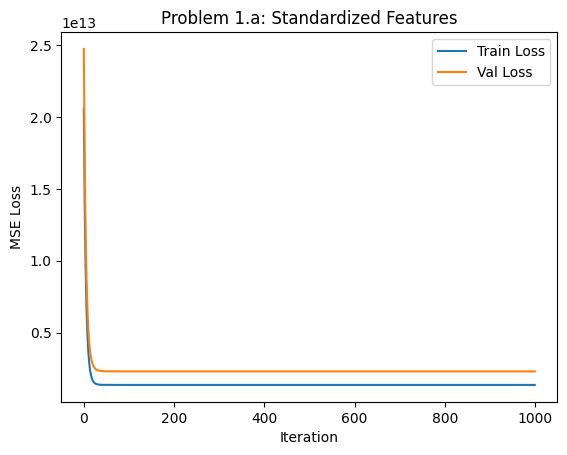

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Helper Functions
def add_bias(X):
    return np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

def mse_loss(X, y, theta):
    predictions = X.dot(theta)
    return np.mean((predictions - y) ** 2)

def gradient_descent(X_train, y_train, X_val, y_val, learning_rate, iterations):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    train_losses = []
    val_losses = []
    for i in range(iterations):
        predictions = X_train.dot(theta)
        error = predictions - y_train
        gradient = (2/m) * X_train.T.dot(error)
        theta = theta - learning_rate * gradient
        train_losses.append(mse_loss(X_train, y_train, theta))
        val_losses.append(mse_loss(X_val, y_val, theta))
    return theta, train_losses, val_losses

def standardize(X):
    """Standardize features to have zero mean and unit variance."""
    mean_vals = X.mean(axis=0)
    std_vals = X.std(axis=0)
    return (X - mean_vals) / std_vals

# Data Loading and Preprocessing
data = pd.read_csv('Housing.csv')

# For Problem 1.a, we use these features:
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = data[features].values
y = data[target].values.reshape(-1, 1)

# Standardize the features to stabilize gradient descent.
X_std = standardize(X)

# Split into training (80%) and validation (20%) sets.
X_train, X_val, y_train, y_val = train_test_split(X_std, y, test_size=0.2, random_state=42)
X_train_bias = add_bias(X_train)
X_val_bias   = add_bias(X_val)

# Hyperparameters
learning_rate = 0.05  # Learning rate for gradient descent
iterations = 1000

# Run gradient descent
theta, train_losses, val_losses = gradient_descent(X_train_bias, y_train, X_val_bias, y_val,
                                                    learning_rate, iterations)

print("Problem 1.a - Final Theta:\n", theta)
print("Problem 1.a - Final Training Loss:", train_losses[-1])
print("Problem 1.a - Final Validation Loss:", val_losses[-1])

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Problem 1.a: Standardized Features")
plt.legend()
plt.show()
